## Data analysis for COVID-19

Data extract from github https://github.com/CSSEGISandData/COVID-19.git provided by JHU(johns-hopkins-university) CSSE USA

Data is first loaded from local repository on my computer (check for last data update)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load data from local repository
file_C = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv' # confirmed cases
file_D = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv' # death cases
file_R = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv' # recover cases

# read csv files
df_c = pd.read_csv(file_C)
df_d = pd.read_csv(file_D)
df_r = pd.read_csv(file_R)

### Study confirmed cases in France

In [3]:
df_c.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,29,36,50,50,83,93,99,117,129,149


In [4]:
# identify columns and datetime data
col_names = df_c.columns
date_data = pd.to_datetime(df_c.columns[4:])

In [76]:
# check for data only in main land France (country & region with France as name)
c_study = 'France'
for cidx, c in enumerate(df_c['Country/Region']):
    # check for country match province 
    if c==c_study and df_c['Province/State'][cidx] ==c_study:
        print('Mainland %s dataframe index is %d' %(c,cidx))
        data_france = np.array(df_c.iloc[cidx][4:])
        print(data_france)
    elif c==c_study:
        print(c,', ', df_c['Province/State'][cidx])
        print(np.array(df_c.iloc[cidx][4:]))

Mainland France dataframe index is 159
[0 0 2 3 3 3 4 5 5 5 6 6 6 6 6 6 6 11 11 11 11 11 11 11 12 12 12 12 12 12
 12 12 12 12 14 18 38 57 100 130 191 204 285 377 653 949 1126 1209 1784
 2281]
France ,  St Martin
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2]
France ,  Saint Barthelemy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 1 1 1]


In [77]:
# build a timeseries for france
ts_fr = pd.Series(data_france, index=date_data)

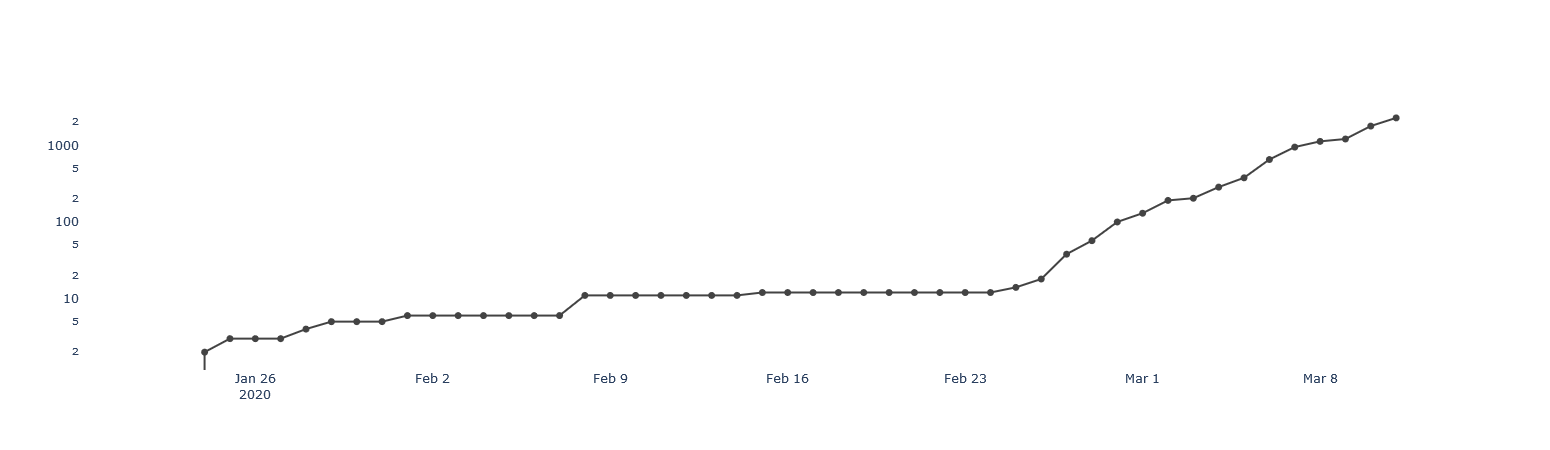

In [78]:
fig_go = go.Figure()
fig_go.add_trace(go.Scatter(
    mode='lines+markers',
    x=ts_fr.index, 
    y=ts_fr,  
    marker=dict(color='rgb(67,67,67)', size=7)
))
fig_go.update_layout(plot_bgcolor='white', yaxis_type="log")
fig_go.show()

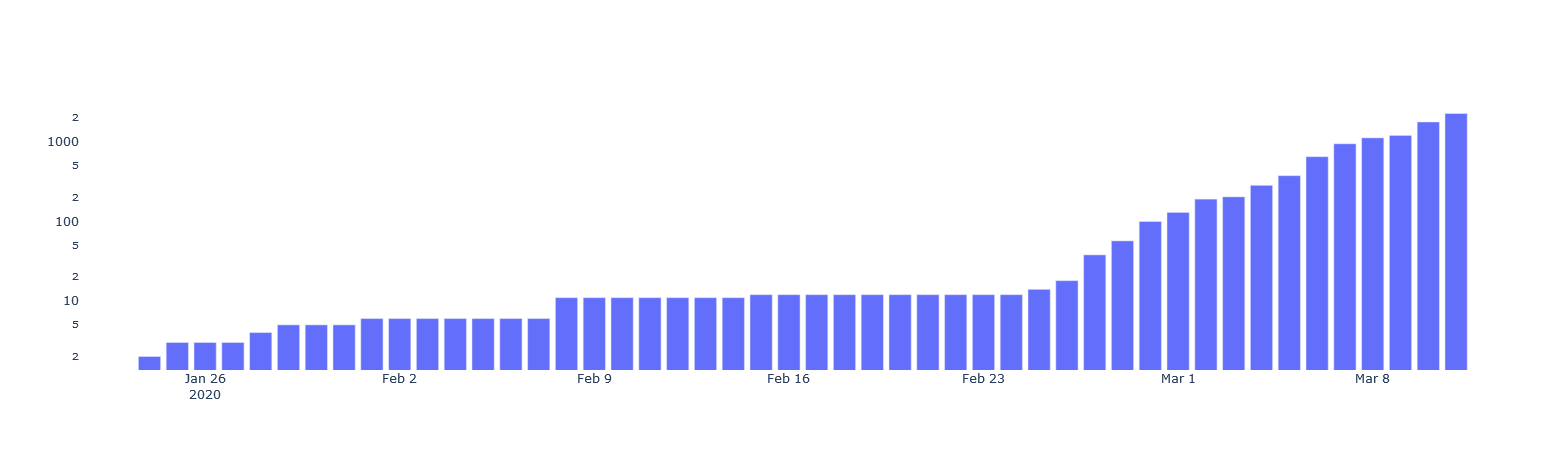

In [80]:
fig = go.Figure([go.Bar(
    x=ts_fr.index, 
    y=ts_fr, 
    )])
fig.update_layout(plot_bgcolor='white', yaxis_type="log")

fig.show()

### Study data from Italy

In [82]:
# check for data only in main land France (country & region with France as name)
c_study = 'Italy'
for cidx, c in enumerate(df_c['Country/Region']):
    # check for country match province 
    if c==c_study:
        print('Mainland %s dataframe index is %d' %(c,cidx))
        data_italy = np.array(df_c.iloc[cidx][4:])
        print(data_italy)

Mainland Italy dataframe index is 16
[0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 20 62 155 229
 322 453 655 888 1128 1694 2036 2502 3089 3858 4636 5883 7375 9172 10149
 12462]


In [83]:
# Create time series for Italy
ts_it = pd.Series(data_italy, index=date_data)

In [110]:
# Display data from Italy
date_flt = pd.datetime(2020,2,21)
fig = go.Figure([go.Bar(
    x=ts_it.index, 
    y=ts_it(ts_it.index > date_flt), 
    marker=dict(color='rgb(255,255,255)', 
                line=dict(color='rgb(67,67,67)', width=1.5))
    )])
fig.update_layout(plot_bgcolor='white', yaxis_type="log")

fig.show()

TypeError: 'Series' object is not callable

### Comp

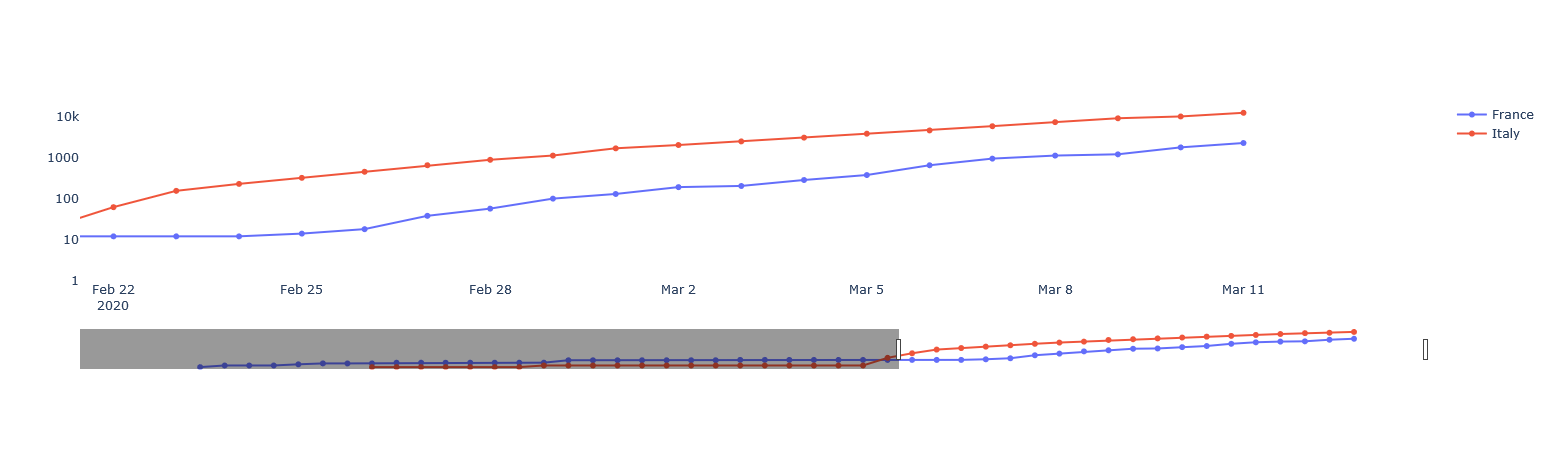

In [95]:
# Compare confirmed cases in France and Italy
fig = go.Figure(data=[
    go.Scatter(name='France', x=ts_fr.index, y=ts_fr, mode='lines+markers'),
    go.Scatter(name='Italy', x=ts_it.index, y=ts_it, mode='lines+markers')
])

fig.update_layout(plot_bgcolor='white', yaxis_type="log", xaxis_rangeslider_visible=True)


fig.show()